
# Project: Investigate a Dataset - TMDb movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#reference">Reference</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description
Data Set Name: "TMDb movie data" / File Name: "tmdb_movies.csv"
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Questions for Analysis:
1. Do ratings correlate with how popular it is?
2. What genre are popular?
3. What genre actually makes profit?

In [40]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df_movie=pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean dataset for analysis.

### General Properties
1. See overall datasets by using .head()
2. Used .shape and found that there are 10866rows and 21 columns in this dataset.
3. Define each numeric column's count, mean, standard deviation, minimum, and maximum. We also find 25,50,75% percentile.
4. Find what data type for each column. Also, we find how many non-null rows there are in each column.

In [41]:
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [42]:
df_movie.shape

(10866, 21)

In [43]:
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [44]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [45]:
#Count how many unique values in each columns
df_movie.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Data Cleaning
1. Drop columns that are not be used in analysis and make it more readble.
2. Some rows in "genres" column are float data type. Change all of them into string.
3. Since "genres" column has so many genres in one row, we will use only the first genre. We split them into groups by "|" and extract only the first genre.
4. Drop null values.
5. Since we want to know their profits, remove rows that budget=0 and/or revenue=0.

In [46]:
# Drop unneeded columns
df_movie=df_movie.drop(['imdb_id','cast','homepage','tagline','keywords','overview','runtime','production_companies','release_date'],axis=1)

In [47]:
# Some row returns as float. Change all of them into string.
df_movie['genres']=df_movie['genres'].astype('str')

In [48]:
# Genres have too much. Show only the first one.
df_movie['genres']=df_movie['genres'].apply(lambda x: x.split("|")[0])

In [49]:
#Drop null values.
df_movie.dropna(inplace=True)
df_movie.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [58]:
# Remove rows that budget and revenue are 0's.
df_movie.drop(df_movie[df_movie['budget']==0].index,inplace=True)
df_movie.drop(df_movie[df_movie['revenue']==0].index,inplace=True)

In [59]:
#Look at how many data is left
df_movie.shape

(3854, 12)

<a id='eda'></a>
## Exploratory Data Analysis

After cleaning data, we are now analyzing and visualizing the datasets!

#### Histogram all columns
Visualize the data to view it's distribution and have a better understanding.

Research Question 1. Do ratings correlate with popularity?
* Sort the dataset by popularity.
* Use scatter plot on popularity and vote_average(rating). 
* Use correlation coefficient to see correlation.
* Split popularity into two groups that one is above average popularity and another is under average popularity. Plot each of these into scatter plot.
* Use correlation coefficient on each groups to see how they are correlated.

Research Question 2: What Genre are Popular?
* Group by "genres" with each genre having it's average popularity.
* Plot "Average Popularity in each Genre" with bar plot.

Research Question 3: What genre actually makes profit?
* Calculate each rows profit by calculating revenue-budget.
* Make copy of datasets and add "profit" column. Then group by "genres" with each genre having it's average profit.
* Plot "Average Profit in each Genre" with bar plot.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

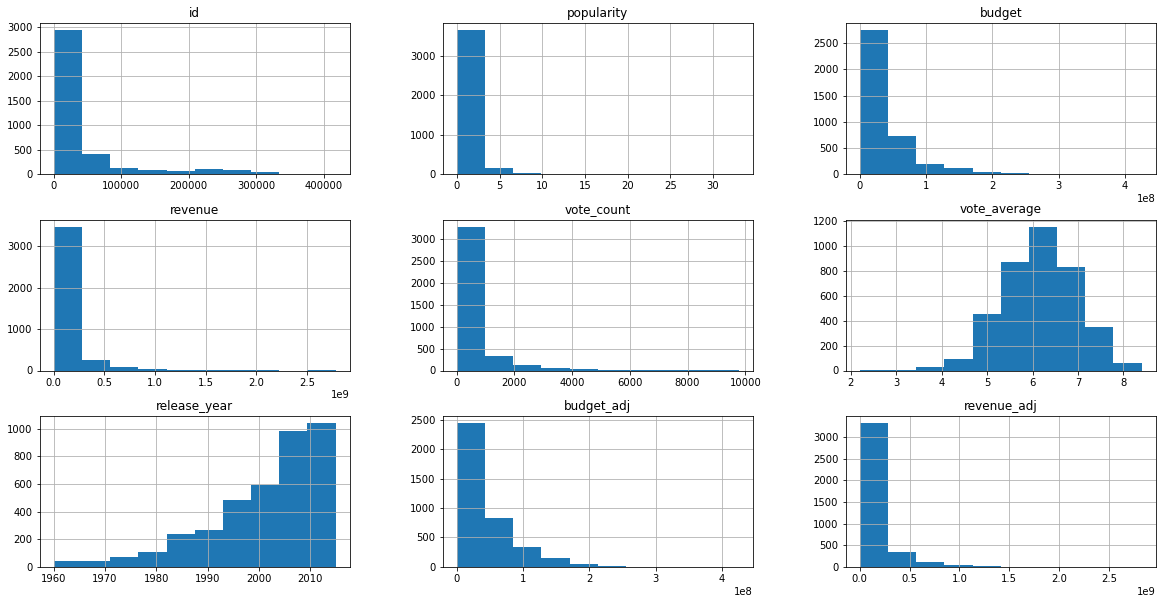

In [60]:
#Visualize all columns
df_movie.hist(figsize=(20,10))

### Research Question 1: Do ratings correlate with popularity?

In [61]:
#Order by popularity
df_p=df_movie.sort_values(by='popularity',ascending=False)

<AxesSubplot:title={'center':'Popularity Vs. Vote_average'}, xlabel='popularity', ylabel='vote_average'>

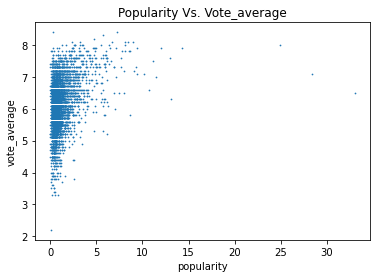

In [62]:
#plot the popularity vs. vote_average
df_p.plot(kind='scatter',x='popularity',y='vote_average',s=0.5,title='Popularity Vs. Vote_average')

In [63]:
#Correlation coefficients.
np.corrcoef(df_p['popularity'],df_p['vote_average'])

array([[1.        , 0.31786873],
       [0.31786873, 1.        ]])

Low positive correlation between popularity and vote_average.

<AxesSubplot:title={'center':'Low Popularity Vs. Vote_average'}, xlabel='popularity', ylabel='vote_average'>

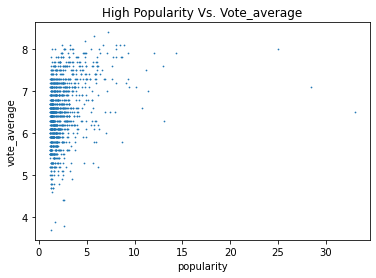

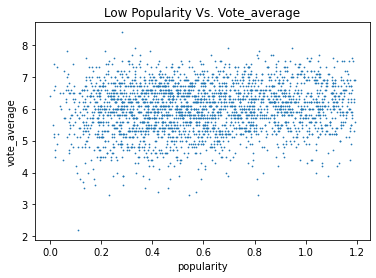

In [64]:
# Now compare ratings into groups that one is above average and one is under average.
#First calculate the average popularity
avg_popularity=df_movie['popularity'].mean()

#Make two groups of data. One is above average popularity, and another is under average popularity.
df_popularity_above_avg=df_movie[df_movie['popularity']>avg_popularity]
df_popularity_under_avg=df_movie[df_movie['popularity']<=avg_popularity]

#Plot the two groups.
df_popularity_above_avg.plot(kind='scatter',x='popularity',y='vote_average',s=0.5,title='High Popularity Vs. Vote_average')
df_popularity_under_avg.plot(kind='scatter',x='popularity',y='vote_average',s=0.5,title='Low Popularity Vs. Vote_average')

In [65]:
#Calculate Correlation Coefficient for above average popularity group
np.corrcoef(df_popularity_above_avg['popularity'],df_popularity_above_avg['vote_average'])

array([[1.       , 0.3005648],
       [0.3005648, 1.       ]])

In [66]:
#How many data for group that are above average popularity
df_popularity_above_avg.shape

(1199, 12)

In [67]:
#Calculate Correlation Coefficient for under average popularity group
np.corrcoef(df_popularity_under_avg['popularity'],df_popularity_under_avg['vote_average'])

array([[1.        , 0.11615309],
       [0.11615309, 1.        ]])

In [68]:
#How many data for group that are under average popularity
df_popularity_under_avg.shape

(2655, 12)

This shows that even splitting into two group, they both have low positive correlation.
Above average popularity have more correlation with vote_average than Under average popularity. 

### Research Question 2: What genre are popular?

In [69]:
#Group by "genres" with it's average popularity
df_g_p=df_movie.groupby('genres')['popularity'].mean()
print(df_g_p)

genres
Action             1.442326
Adventure          1.905525
Animation          1.712723
Comedy             0.914765
Crime              1.072113
Documentary        0.289461
Drama              0.928449
Family             1.609295
Fantasy            1.581660
History            1.442235
Horror             0.855787
Music              0.914098
Mystery            1.133780
Romance            1.369972
Science Fiction    1.931437
TV Movie           0.273628
Thriller           1.171430
War                1.658497
Western            1.193918
Name: popularity, dtype: float64


In [70]:
#How many genres
df_g_p.count()

19

Text(0, 0.5, 'Popularity')

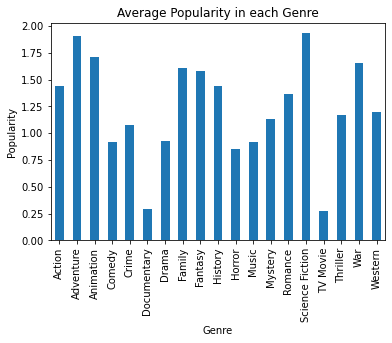

In [71]:
#Plot Average Popularity in each Genre
df_g_p.plot(x='genres',y='popularity',kind='bar',title="Average Popularity in each Genre")
plt.xlabel("Genre")
plt.ylabel('Popularity')

In [72]:
#Percentage of top 3 and top 2 comparison
top3_percent=(df_g_p['Science Fiction']+df_g_p['Adventure']+df_g_p['Animation'])/df_g_p.sum()
top2_percent=(df_g_p['Science Fiction']+df_g_p['Adventure'])/df_g_p.sum()

#Percentage of least 2
least2_percent=(df_g_p['Documentary']+df_g_p['TV Movie'])/df_g_p.sum()

print(top3_percent)
print(top2_percent)
print(least2_percent)

0.23715488262822806
0.16396502262545648
0.024062500709213234


Top 3 popular genres are Science Fiction, Adventure, and Animation.

### Research Question3: What genre actually makes profit?

Analysis on profit=revenue-budget. While I understand that profit=revenue-expenses, I think budget is solid enough to be consider as expense because budgets are forcasted future expenses. This is for reference that is it worth it to make a movie on that certain genre. 

In [73]:
#Calculate profit for every row
df_profit=df_movie['revenue']-df_movie['budget']
print(df_profit)

0        1363528810
1         228436354
2         185238201
3        1868178225
4        1316249360
            ...    
10822      26236689
10828      10000000
10829       1347000
10835       8000000
10848       6885000
Length: 3854, dtype: int64


In [74]:
#Make a copy to not make changes in the original dataset.
df_copy=df_movie.copy()
df_copy['profit']=df_profit

#Group by genres with each having it's average profit.
df_g_profit=df_copy.groupby('genres')['profit'].mean()
print(df_g_profit)

genres
Action             8.418307e+07
Adventure          1.565080e+08
Animation          1.961203e+08
Comedy             5.257658e+07
Crime              4.499700e+07
Documentary        1.699880e+07
Drama              4.013670e+07
Family             1.571622e+08
Fantasy            1.041750e+08
History            7.828396e+07
Horror             3.982101e+07
Music              4.524902e+07
Mystery            4.163414e+07
Romance            7.383663e+07
Science Fiction    1.210682e+08
TV Movie           3.700000e+07
Thriller           4.522713e+07
War                7.627563e+07
Western            3.383666e+07
Name: profit, dtype: float64


Text(0, 0.5, 'Profit')

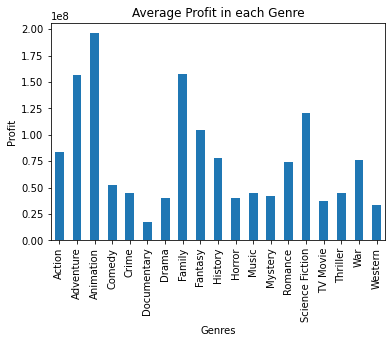

In [75]:
#Plot Average Plot in each Genre
df_g_profit.plot(x='genres',y='profit',kind='bar',title='Average Profit in each Genre')
plt.xlabel('Genres')
plt.ylabel('Profit')

In [76]:
#Percentage of top 3 and top 2 comparison
top3_percent=(df_g_p['Animation']+df_g_p['Adventure']+df_g_p['Family'])/df_g_p.sum()
animation_percent=df_g_p['Animation']/df_g_p.sum()

#Percentage of least 2
documentary_percent=df_g_p['Documentary']/df_g_p.sum()

print(top3_percent)
print(animation_percent)
print(documentary_percent)

0.2233887585246347
0.07318986000277161
0.012369545110950219


High Profit are Animation, Adventure, Family, and Science Fiction.

<a id='conclusions'></a>
## Conclusions

* From the first question, we found that popular movies are slightly correlated with higher ratings. With samples of 3854 movies, the correlation is about 0.3 which is a low positive correlation. I was thinking about the reason why it has low positive correlation, so I split the popularity into two groups to see if there are difference in two groups. One group is above average popularity and another group is under average popularity. Above average popularity with 1199 samples, it has 0.3 correlation with rating. Under average popularity with 2655 samples, it had 0.12 correlation with rating. Thus, even splitting into two groups, popularity has a low positive correlation with ratings. However, the less popular it is, the less correlated with rating because under average popularity group have less correlation with ratings.
* For the second question, I found that popular genres are Science Fiction, Adventure, and Animation. While there are total 19 genres, these top 3 genres are 23.7% from the total popularity. Especially the top 2 genres which are Science Fiction and Adventure, both are above 1.75 popularity and contains 16.4% from the total popularity. Compare with the least 2 which are Documentary and TV Movie, they only contains 2.4% from the total popularity. This means that there are 14% difference between the top2 and least2 genres. Thus, Science Fiction and Adventures are very popular genres that helps the movie industry. 
* For the third question, it was interesting to see that the average profit group by genres are differet ranking compare to the second question. I found that Animation, Adventure, and Family. Science Fiction ranked 4th while it's the most popular genre. Animation was the only one above $1.75+e08 which contains 7.3% of the total profit. The least profit genre was Documentary which only contains 1.2% of the total profit. That is 6.1% difference between the top and least genre. However, not just Animation is powerful since the top3 have 22.3% of the total profit which creates the movie industry significant.

In conclusion, I found that popular movies are slightly correlated with ratings. However, I found that the less popular the movie is, the less correlated with ratings. Also, I found that popular genres are Science Fiction, Adventure, and Animation which contains 16.4% of the total popularity. And I also research on profit difference between genres that I found Animation, Adventure, and Family are the top 3. Thus, Animation and Adventure are ranked in both questions, that they make the movie industry powerful. 

<a id='reference'></a>
## Reference
* https://sparkbyexamples.com/pandas/pandas-drop-rows-with-condition/ - Drop rows that budget and revenue is equal to 0.
* https://datatofish.com/sort-pandas-dataframe/ - to sort by "popularity" in DESC order.
* https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html - Calculate correlation coefficient.